In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
credit = pd.read_csv("archive/bookstore_chain_AB_calgary_2019_2024_dataset/Bookstore Credit Balance Dataset.csv")

In [11]:
credit["date"] = pd.to_datetime(credit["date"])

In [12]:
credit_monthly = (
    credit
    .groupby(pd.Grouper(key="date", freq="M"))
    .agg(
        net_change=("net_change", "sum"),
        balance=("rolling_balance", "last")
    )
    .reset_index()
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_6972\2002439575.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))


In [13]:
loans = pd.read_csv("archive/bookstore_chain_AB_calgary_2019_2024_dataset/bookstore_loans.csv")

In [14]:
loans.head()

,quarter_end,loan_name,loan_id,principal_outstanding,interest_accrued,repayment,dataset
0,2020-03-30,Government Relief Loan,GOVT-CEBA,40000.0,0.0,0.0,bookstore_loans
1,2020-06-30,Government Relief Loan,GOVT-CEBA,40000.0,0.0,0.0,bookstore_loans
2,2020-09-30,Government Relief Loan,GOVT-CEBA,40000.0,0.0,0.0,bookstore_loans
3,2020-12-30,Government Relief Loan,GOVT-CEBA,40000.0,0.0,0.0,bookstore_loans
4,2021-03-30,Government Relief Loan,GOVT-CEBA,40000.0,0.0,0.0,bookstore_loans


In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter_end            44 non-null     object 
 1   loan_name              44 non-null     object 
 2   loan_id                44 non-null     object 
 3   principal_outstanding  44 non-null     float64
 4   interest_accrued       44 non-null     float64
 5   repayment              44 non-null     float64
 6   dataset                44 non-null     object 
dtypes: float64(3), object(4)
memory usage: 2.5+ KB


In [16]:
loans["date"] = pd.to_datetime(loans["quarter_end"])
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   quarter_end            44 non-null     object        
 1   loan_name              44 non-null     object        
 2   loan_id                44 non-null     object        
 3   principal_outstanding  44 non-null     float64       
 4   interest_accrued       44 non-null     float64       
 5   repayment              44 non-null     float64       
 6   dataset                44 non-null     object        
 7   date                   44 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.9+ KB


In [17]:
loans_q = (
    loans
    .groupby("date")
    .agg(
        outstanding=("principal_outstanding", "sum"),
        interest=("interest_accrued", "sum"),
        repayment=("repayment", "sum")
    )
    .reset_index()
)

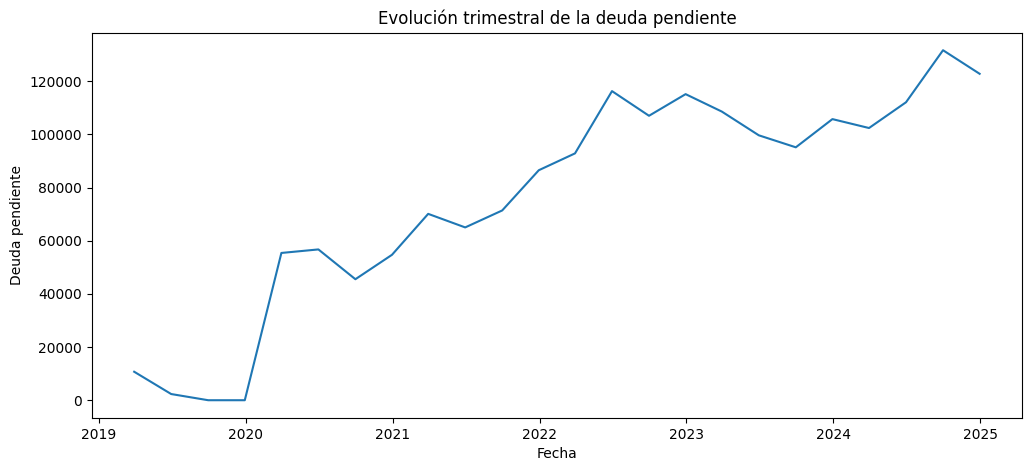

In [18]:
plt.figure(figsize=(12,5))
plt.plot(loans_q["date"], loans_q["outstanding"])
plt.title("Evolución trimestral de la deuda pendiente")
plt.xlabel("Fecha")
plt.ylabel("Deuda pendiente")
plt.show()


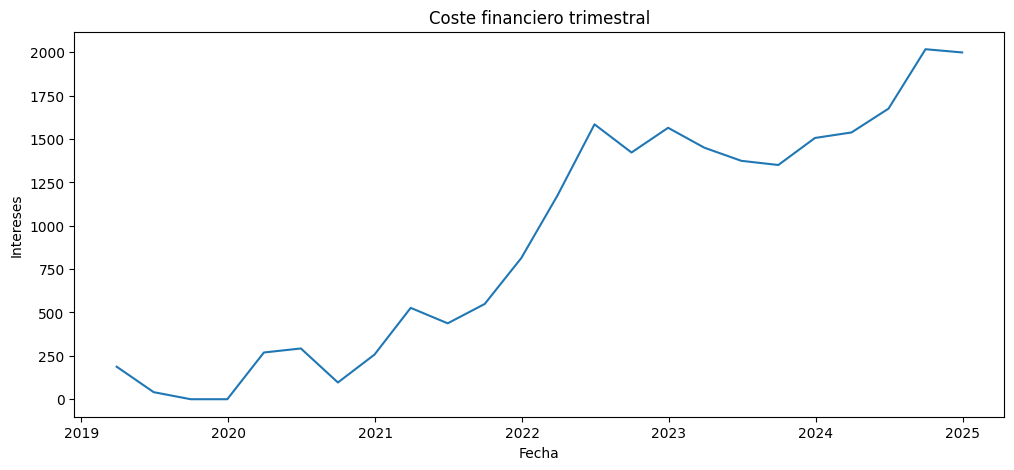

In [19]:
plt.figure(figsize=(12,5))
plt.plot(loans_q["date"], loans_q["interest"])
plt.title("Coste financiero trimestral")
plt.xlabel("Fecha")
plt.ylabel("Intereses")
plt.show()

In [20]:
credit_q = (
    credit_monthly
    .groupby(pd.Grouper(key="date", freq="Q"))
    .agg(balance=("balance", "last"))
    .reset_index()
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_6972\1180732008.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  .groupby(pd.Grouper(key="date", freq="Q"))


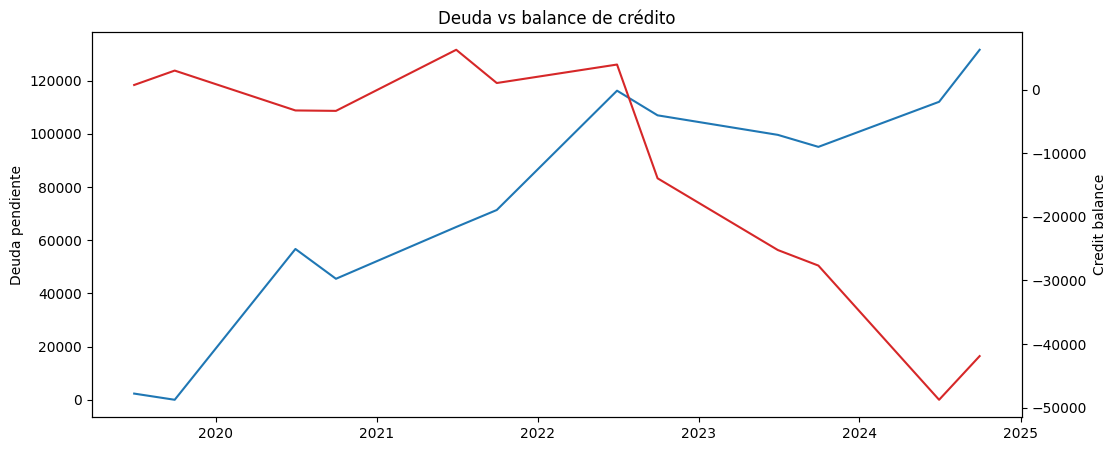

In [21]:
lc = pd.merge(
    loans_q[["date", "outstanding"]],
    credit_q,
    on="date",
    how="inner"
)

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(lc["date"], lc["outstanding"], color="tab:blue")
ax1.set_ylabel("Deuda pendiente")

ax2 = ax1.twinx()
ax2.plot(lc["date"], lc["balance"], color="tab:red")
ax2.set_ylabel("Credit balance")

plt.title("Deuda vs balance de crédito")
plt.show()

El análisis de los préstamos muestra un incremento sostenido tanto del saldo de deuda como del coste financiero desde el periodo post-COVID. Al compararlo con el balance de crédito, se observa que la financiación externa no revierte el deterioro de la liquidez, sino que actúa como un amplificador de los problemas derivados de la pérdida de eficiencia operativa.